# Data exploration and visualisation

In [5]:
# imports

import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from report_writer import ReportWriter
from utils import get_info

In [32]:
RESULTS_FOLDER = "results"
DATA_FOLDER = "../data"
TEMP_FOLDER = "../tmp"

report = ReportWriter(os.path.join(RESULTS_FOLDER, 'data_visualization.xlsx'))


In [33]:

df_train_path = os.path.join(DATA_FOLDER, 'train_dataset.csv')
df_train = pd.read_csv(df_train_path)


## Demographic analysis

- Analyse data by race
- Analyse  data by gender

Added DataFrame sheet: race_percentages
Added image sheet: race_percentages_pie


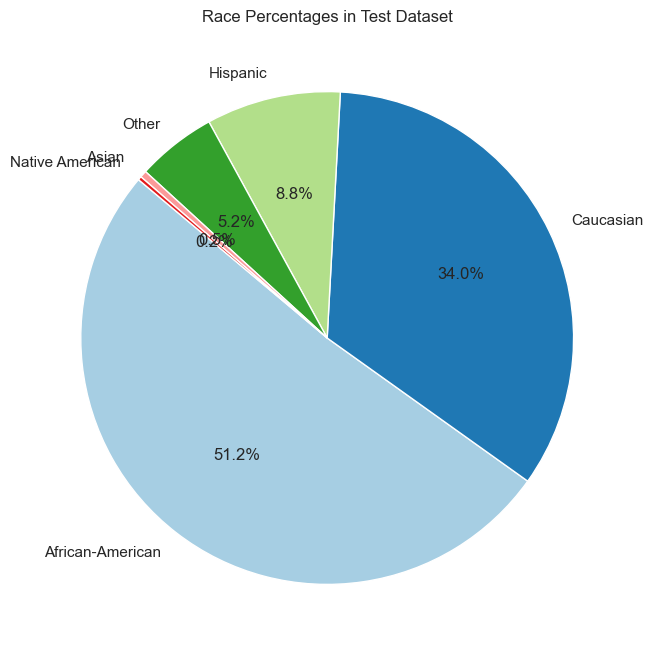

In [ ]:
# Calculate race counts and percentages
race_counts = df_train['race'].value_counts()
race_percentages = (race_counts / race_counts.sum() * 100).round(2)

# Save percentages
race_percentages_df = pd.DataFrame({
    'Race': race_percentages.index,
    'Percentage': race_percentages.values,
    'Counts' : race_counts
})

report.add_data_frame(race_percentages_df, 'race_percentages')

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    race_percentages, 
    labels=race_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Race Percentages in Test Dataset")
plt.savefig(os.path.join(TEMP_FOLDER, 'race_percentages_pie.png'))
report.add_current_plt(os.path.join(TEMP_FOLDER, 'race_percentages_pie.png'), 'race_percentages_pie')

plt.show()


Added DataFrame sheet: sex_percentages
Added image sheet: sex_percentages_pie


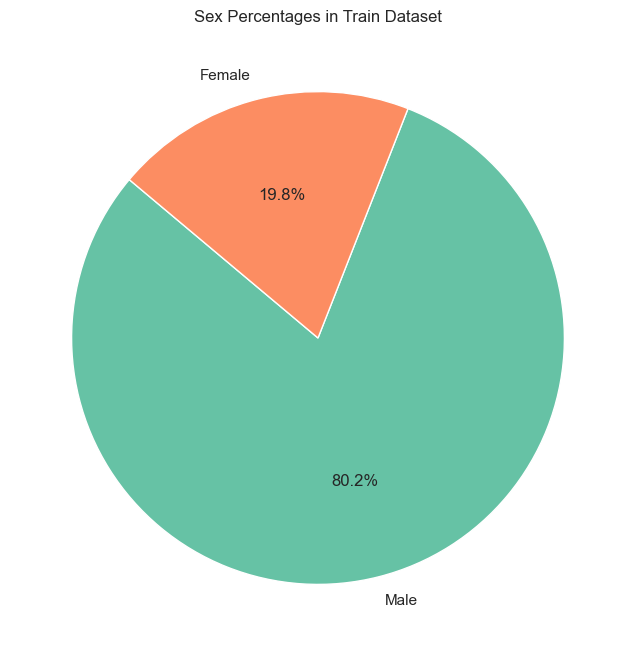

In [36]:
# Calculate sex counts and percentages
sex_counts = df_train['sex'].value_counts()
sex_percentages = (sex_counts / sex_counts.sum() * 100).round(2)

# Save percentages into a DataFrame
sex_percentages_df = pd.DataFrame({
    'Sex': sex_percentages.index,
    'Percentage': sex_percentages.values
})

report.add_data_frame(sex_percentages_df, 'sex_percentages')


# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sex_percentages, 
    labels=sex_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set2.colors
)
plt.title("Sex Percentages in Train Dataset")
plt.savefig(os.path.join(TEMP_FOLDER, 'sex_percentages_pie.png'))
report.add_current_plt(os.path.join(TEMP_FOLDER, 'sex_percentages_pie.png'), 'sex_percentages_pie')
plt.show()


Added image sheet: age_by_race_boxplot


C:\Users\carme\AppData\Local\Temp\ipykernel_34656\3253447490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="race", y="age", data=df_train, palette="Set2")


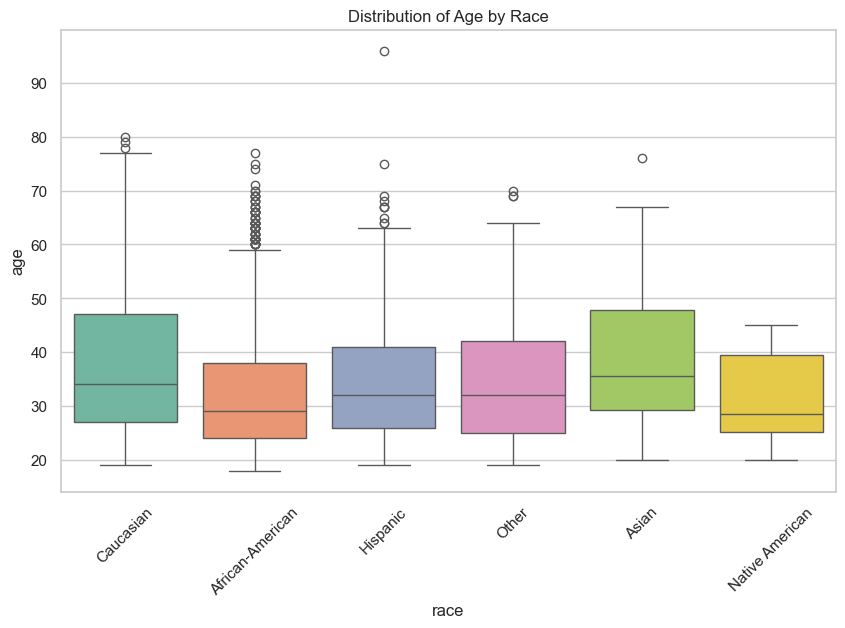

In [39]:
# Distribution of Age by Race
plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="age", data=df_train, palette="Set2")
plt.title("Distribution of Age by Race")
plt.xticks(rotation=45)

plt.savefig(os.path.join(TEMP_FOLDER, 'age_by_race_boxplot.png'))
report.add_current_plt(os.path.join(TEMP_FOLDER, 'age_by_race_boxplot.png'), 'age_by_race_boxplot')
plt.show()

C:\Users\carme\AppData\Local\Temp\ipykernel_34656\37528939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="race", y="age", data=df_train, palette="Set2")


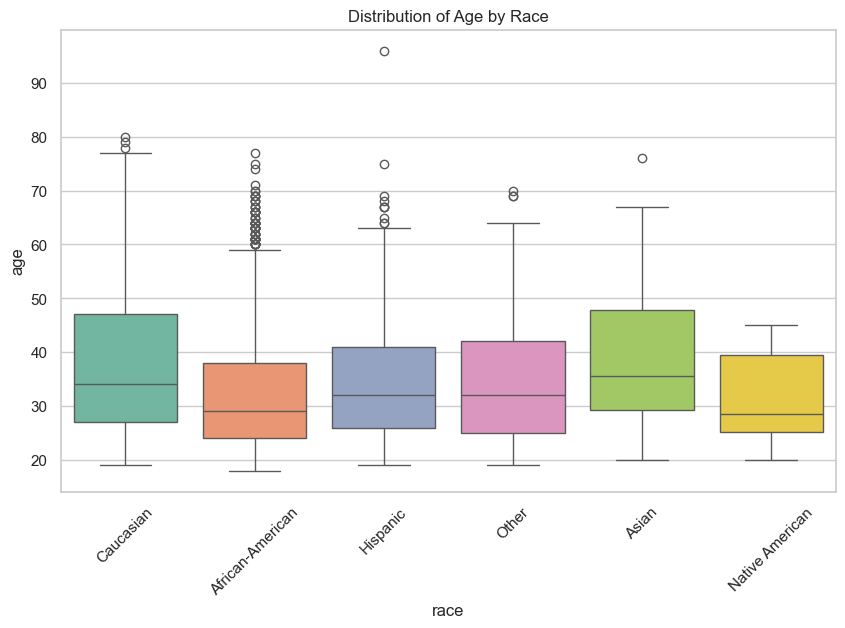

C:\Users\carme\AppData\Local\Temp\ipykernel_34656\37528939.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="race", y="two_year_recid", data=recidivism_by_race, palette="coolwarm")


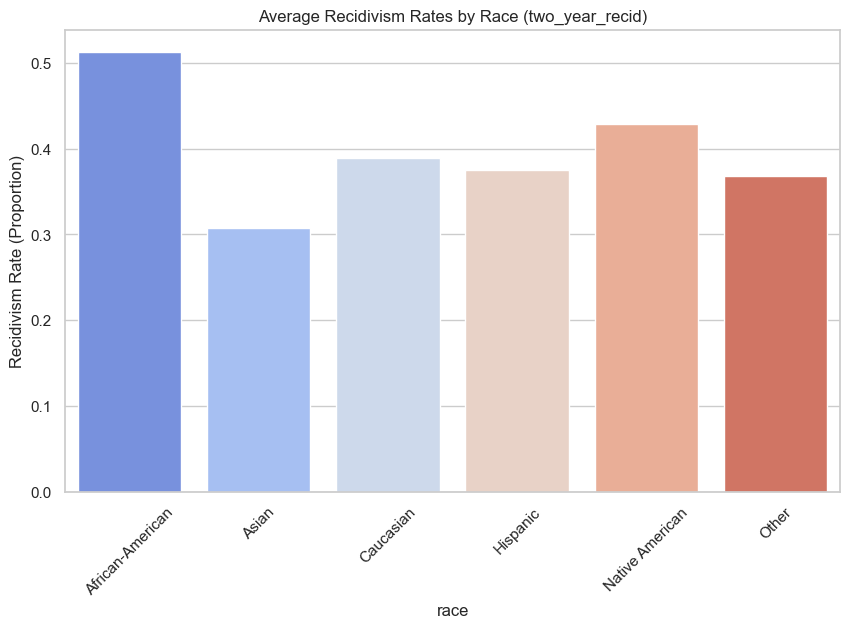

C:\Users\carme\AppData\Local\Temp\ipykernel_34656\37528939.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="race", y="decile_score", data=df_train, palette="viridis")


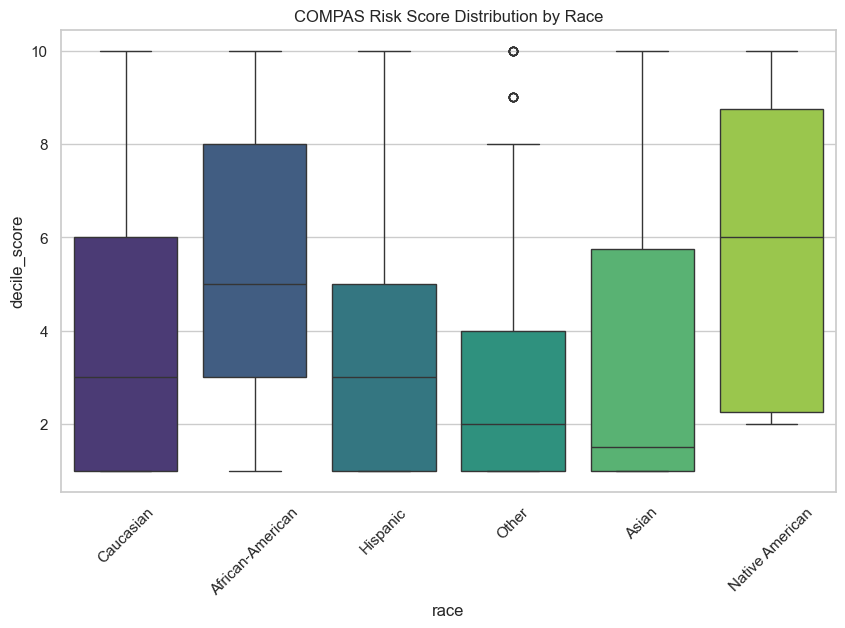

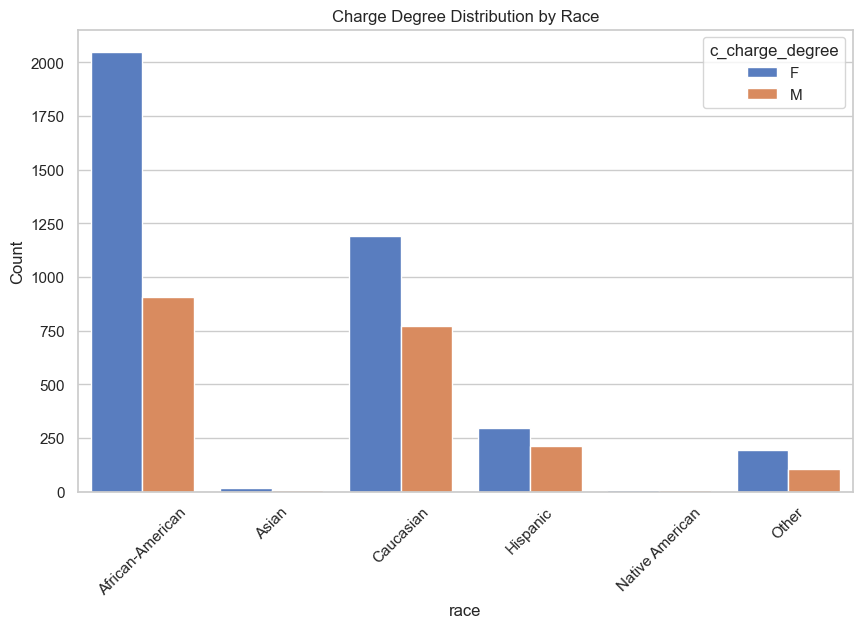

In [37]:

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

### 1. Distribution of Age by Race
plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="age", data=df_train, palette="Set2")
plt.title("Distribution of Age by Race")
plt.xticks(rotation=45)
plt.show()

### 2. Recidivism Rates (two_year_recid) by Race
plt.figure(figsize=(10, 6))
recidivism_by_race = df_train.groupby('race')['two_year_recid'].mean().reset_index()
sns.barplot(x="race", y="two_year_recid", data=recidivism_by_race, palette="coolwarm")
plt.title("Average Recidivism Rates by Race (two_year_recid)")
plt.ylabel("Recidivism Rate (Proportion)")
plt.xticks(rotation=45)
plt.show()

### 3. COMPAS Risk Scores by Race
plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="decile_score", data=df_train, palette="viridis")
plt.title("COMPAS Risk Score Distribution by Race")
plt.xticks(rotation=45)
plt.show()

### 4. Charge Degree Distribution by Race
plt.figure(figsize=(10, 6))
charge_degree_by_race = df_train.groupby(['race', 'c_charge_degree']).size().reset_index(name='count')
sns.barplot(x="race", y="count", hue="c_charge_degree", data=charge_degree_by_race, palette="muted")
plt.title("Charge Degree Distribution by Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x800 with 0 Axes>

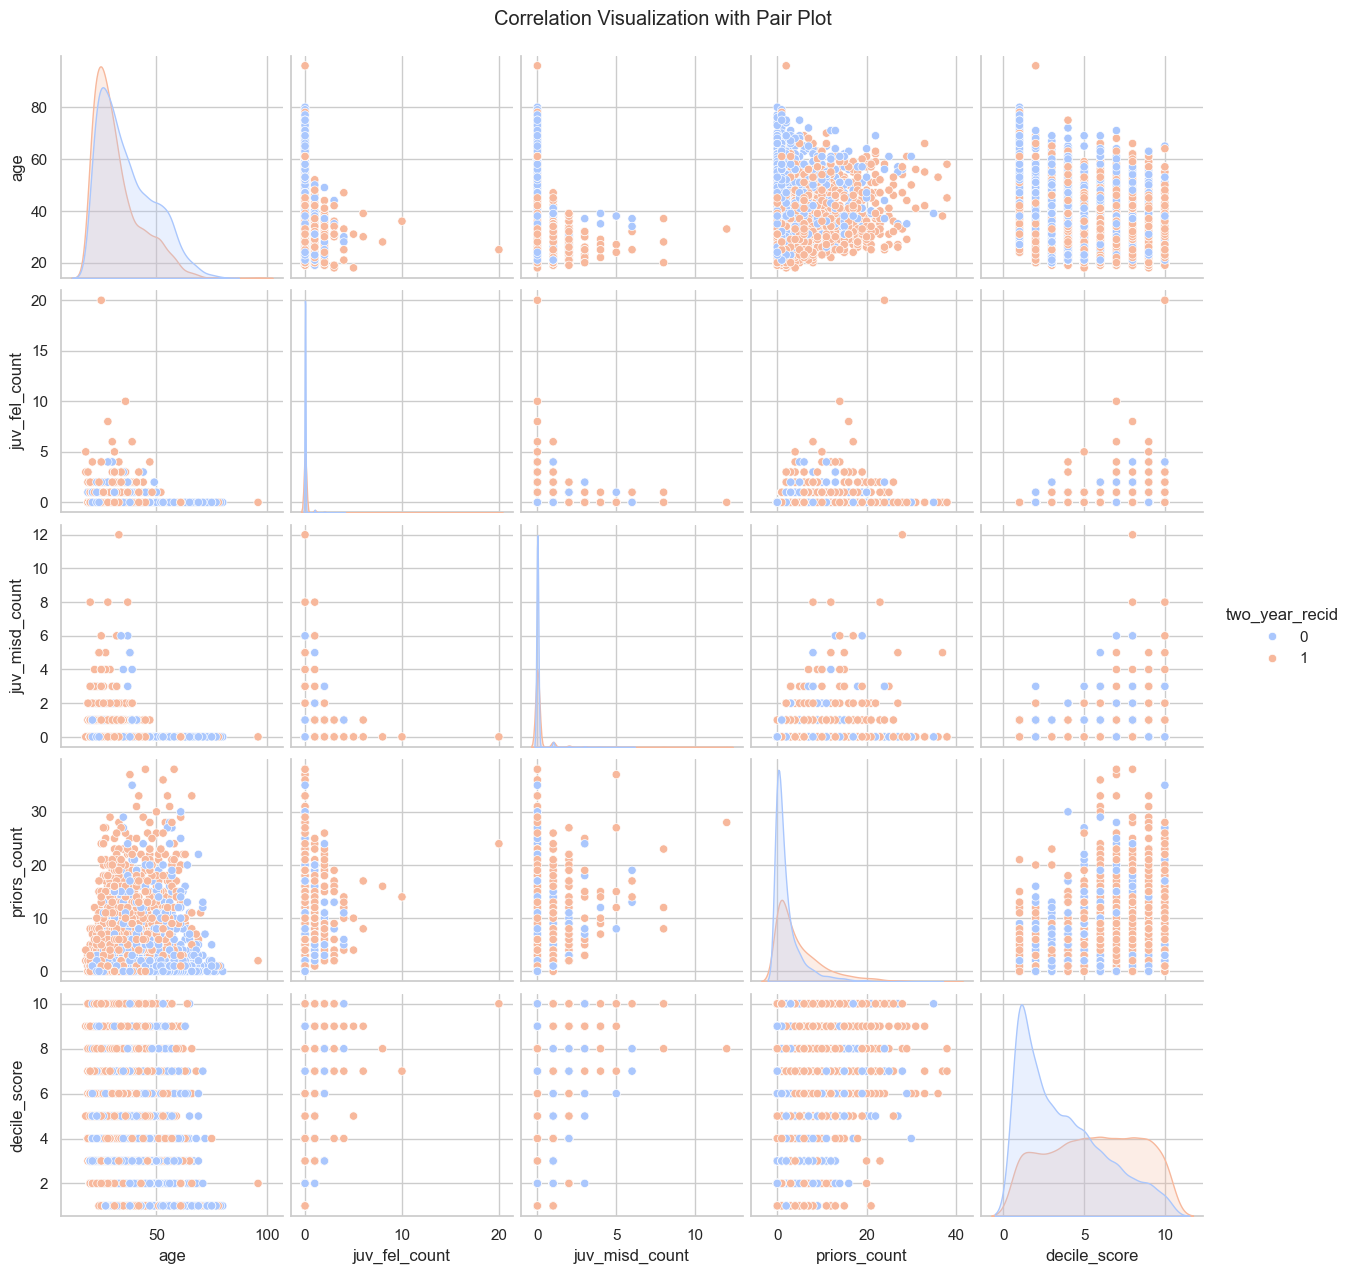

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation
numerical_columns = ['age', 'juv_fel_count', 'juv_misd_count', 
                     'priors_count', 'decile_score', 'two_year_recid']

# Subset the DataFrame for pair plot
df_subset = df_train[numerical_columns]

# Create a pair plot to visualize correlations
plt.figure(figsize=(10, 8))
sns.pairplot(df_subset, hue='two_year_recid', palette='coolwarm', diag_kind='kde')
plt.suptitle("Correlation Visualization with Pair Plot", y=1.02)
plt.show()


Correlation Matrix:
                              age  juv_fel_count  juv_misd_count  \
age                      1.000000      -0.054645       -0.113348   
juv_fel_count           -0.054645       1.000000        0.077071   
juv_misd_count          -0.113348       0.077071        1.000000   
juv_other_count         -0.152509       0.049284        0.286483   
priors_count             0.149479       0.180951        0.243871   
days_b_screening_arrest -0.044661       0.019451        0.013794   
decile_score            -0.377400       0.172442        0.210803   
two_year_recid          -0.189160       0.084420        0.107444   
days_in_jail             0.020387       0.064332        0.048237   
sex_Female               0.005142      -0.053388       -0.047543   
sex_Male                -0.005142       0.053388        0.047543   
race_African-American   -0.171329       0.070557        0.094194   
race_Asian               0.025976      -0.009245       -0.007283   
race_Caucasian           0.1

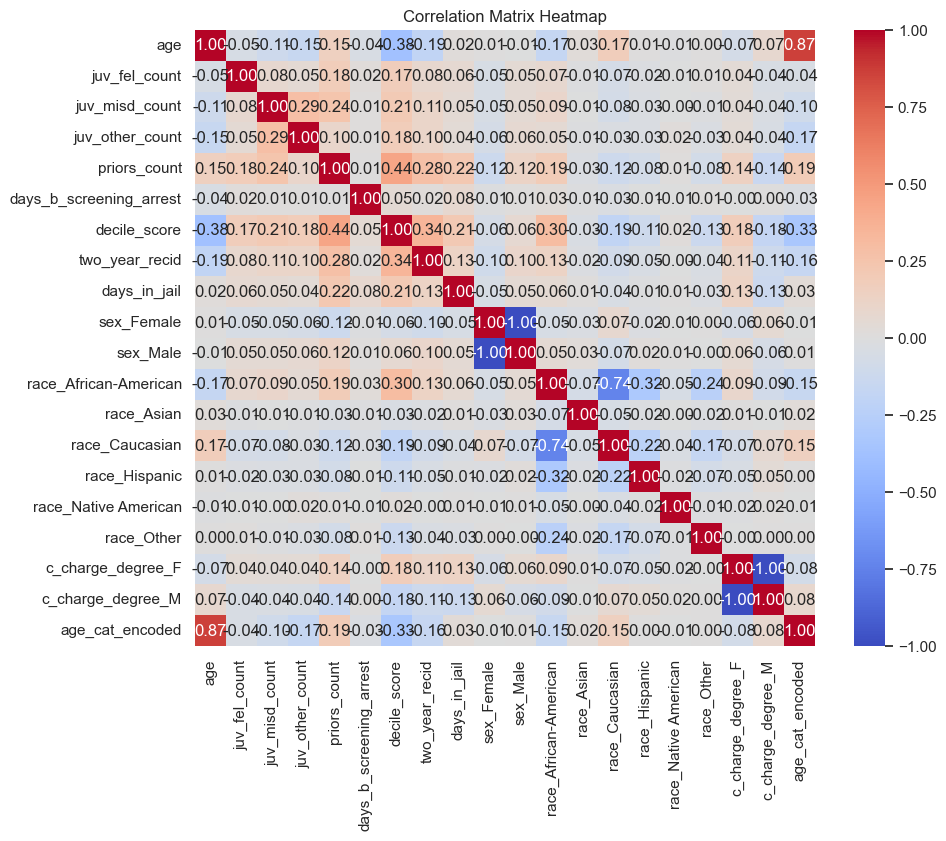

In [22]:
# Select only numerical columns for correlation analysis
numerical_columns = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation of two_year_recid and decile_score by race:
               race         level_1  correlation
0  African-American  two_year_recid     0.327138
1             Asian  two_year_recid     0.625000
2         Caucasian  two_year_recid     0.336025
3          Hispanic  two_year_recid     0.218815
4   Native American  two_year_recid     0.600256
5             Other  two_year_recid     0.322064


C:\Users\carme\AppData\Local\Temp\ipykernel_34656\4035391209.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='correlation', data=correlation_by_race, palette='coolwarm')


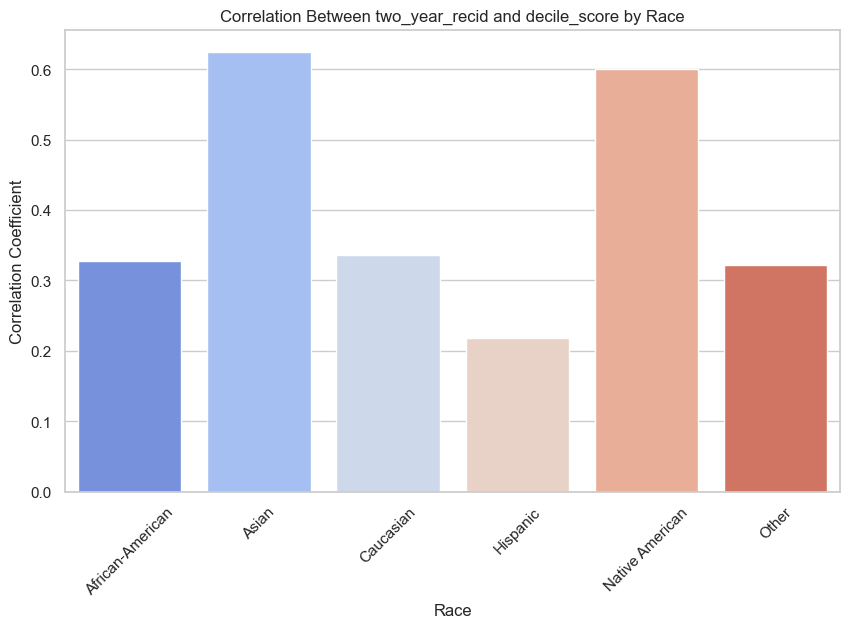

In [23]:
# Group the data by race and calculate correlation between 'two_year_recid' and 'decile_score'
correlation_by_race = (
    df_train.groupby('race')[['two_year_recid', 'decile_score']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'decile_score': 'correlation'})
)

# Display the correlation results
print("Correlation of two_year_recid and decile_score by race:")
print(correlation_by_race)

# Visualize the correlation using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='correlation', data=correlation_by_race, palette='coolwarm')
plt.title("Correlation Between two_year_recid and decile_score by Race")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.show()


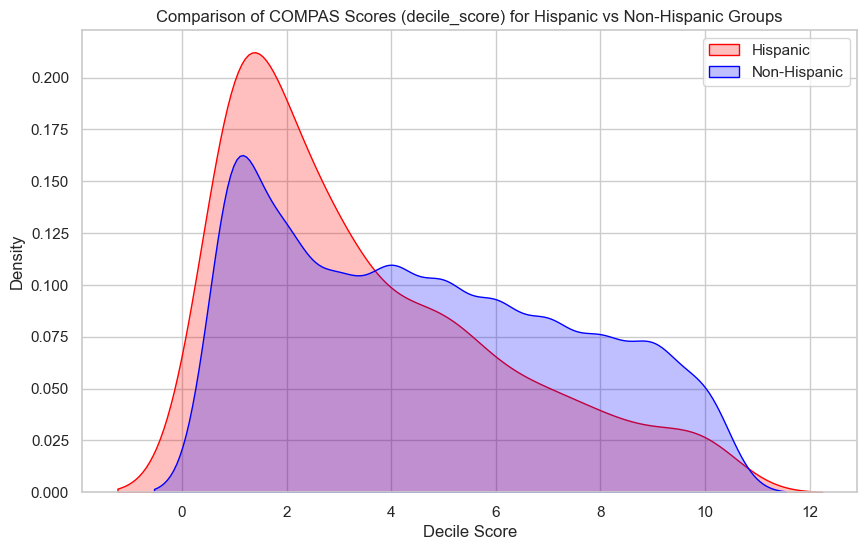

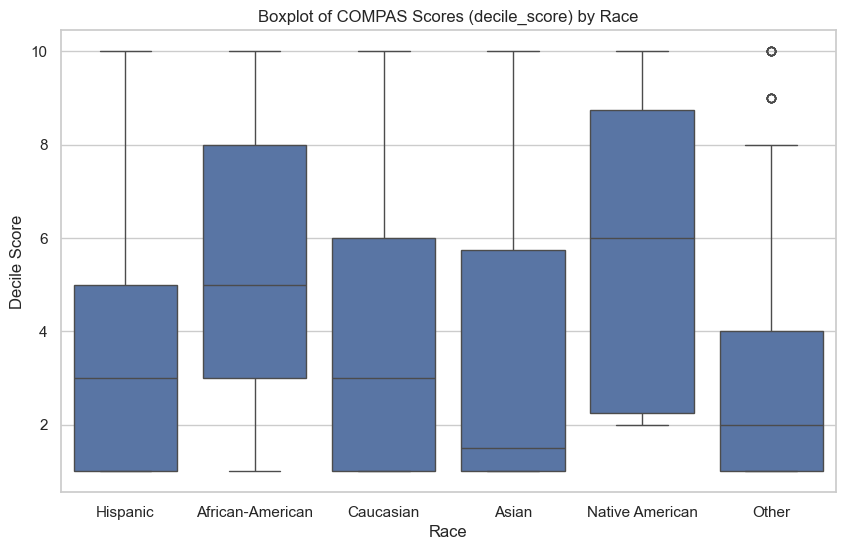

In [24]:
# Separate Hispanic group and others
df_hispanic = df_train[df_train['race'] == 'Hispanic']
df_non_hispanic = df_train[df_train['race'] != 'Hispanic']

# Plot KDE of decile_score
plt.figure(figsize=(10, 6))
sns.kdeplot(df_hispanic['decile_score'], label='Hispanic', fill=True, color='red')
sns.kdeplot(df_non_hispanic['decile_score'], label='Non-Hispanic', fill=True, color='blue')
plt.title("Comparison of COMPAS Scores (decile_score) for Hispanic vs Non-Hispanic Groups")
plt.xlabel("Decile Score")
plt.ylabel("Density")
plt.legend()
plt.show()

# Boxplot of decile_score by race
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='decile_score', data=df_train, order=['Hispanic', 'African-American', 'Caucasian', 'Asian', 'Native American', 'Other'])
plt.title("Boxplot of COMPAS Scores (decile_score) by Race")
plt.xlabel("Race")
plt.ylabel("Decile Score")
plt.show()


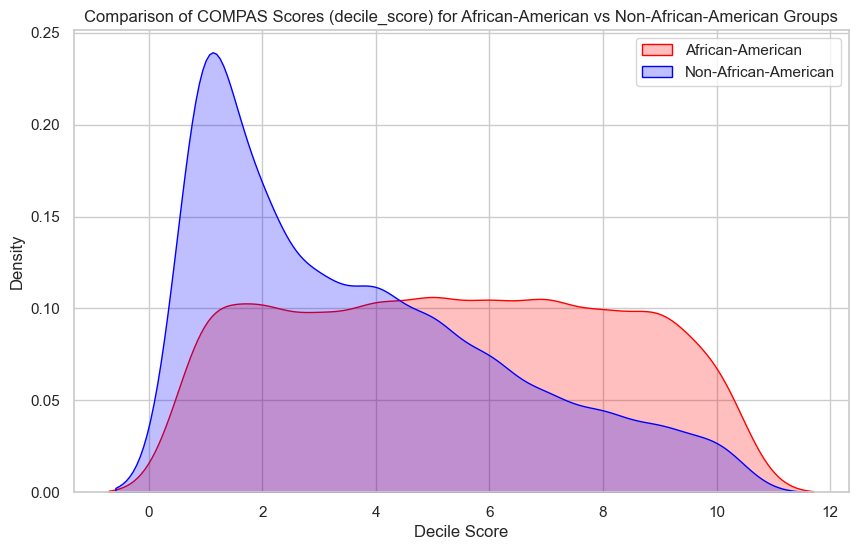

In [25]:
# Separate African americans group and others
df_hispanic = df_train[df_train['race'] == 'African-American']
df_non_hispanic = df_train[df_train['race'] != 'African-American']

# Plot KDE of decile_score
plt.figure(figsize=(10, 6))
sns.kdeplot(df_hispanic['decile_score'], label='African-American', fill=True, color='red')
sns.kdeplot(df_non_hispanic['decile_score'], label='Non-African-American', fill=True, color='blue')
plt.title("Comparison of COMPAS Scores (decile_score) for African-American vs Non-African-American Groups")
plt.xlabel("Decile Score")
plt.ylabel("Density")
plt.legend()
plt.show()


C:\Users\carme\AppData\Local\Temp\ipykernel_34656\2227974354.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_train.groupby(['race', 'Risk_Group', 'two_year_recid']).size().unstack(fill_value=0)
C:\Users\carme\AppData\Local\Temp\ipykernel_34656\2227974354.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals_data = df_train.groupby(['Risk_Group', 'two_year_recid']).size().unstack(fill_value=0)


Numerical Representation of Individuals by Race, Risk Group, and Two-Year Recidivism:
two_year_recid              race Risk_Group    0    1
0               African-American        Low  789  423
1               African-American     Medium  423  514
2               African-American       High  228  580
3                          Asian        Low   16    2
4                          Asian     Medium    1    4
5                          Asian       High    1    2
6                      Caucasian        Low  910  358
7                      Caucasian     Medium  224  247
8                      Caucasian       High   66  158
9                       Hispanic        Low  246  105
10                      Hispanic     Medium   48   57
11                      Hispanic       High   24   29
12               Native American        Low    5    1
13               Native American     Medium    2    1
14               Native American       High    1    4
15                         Other        Low  163  

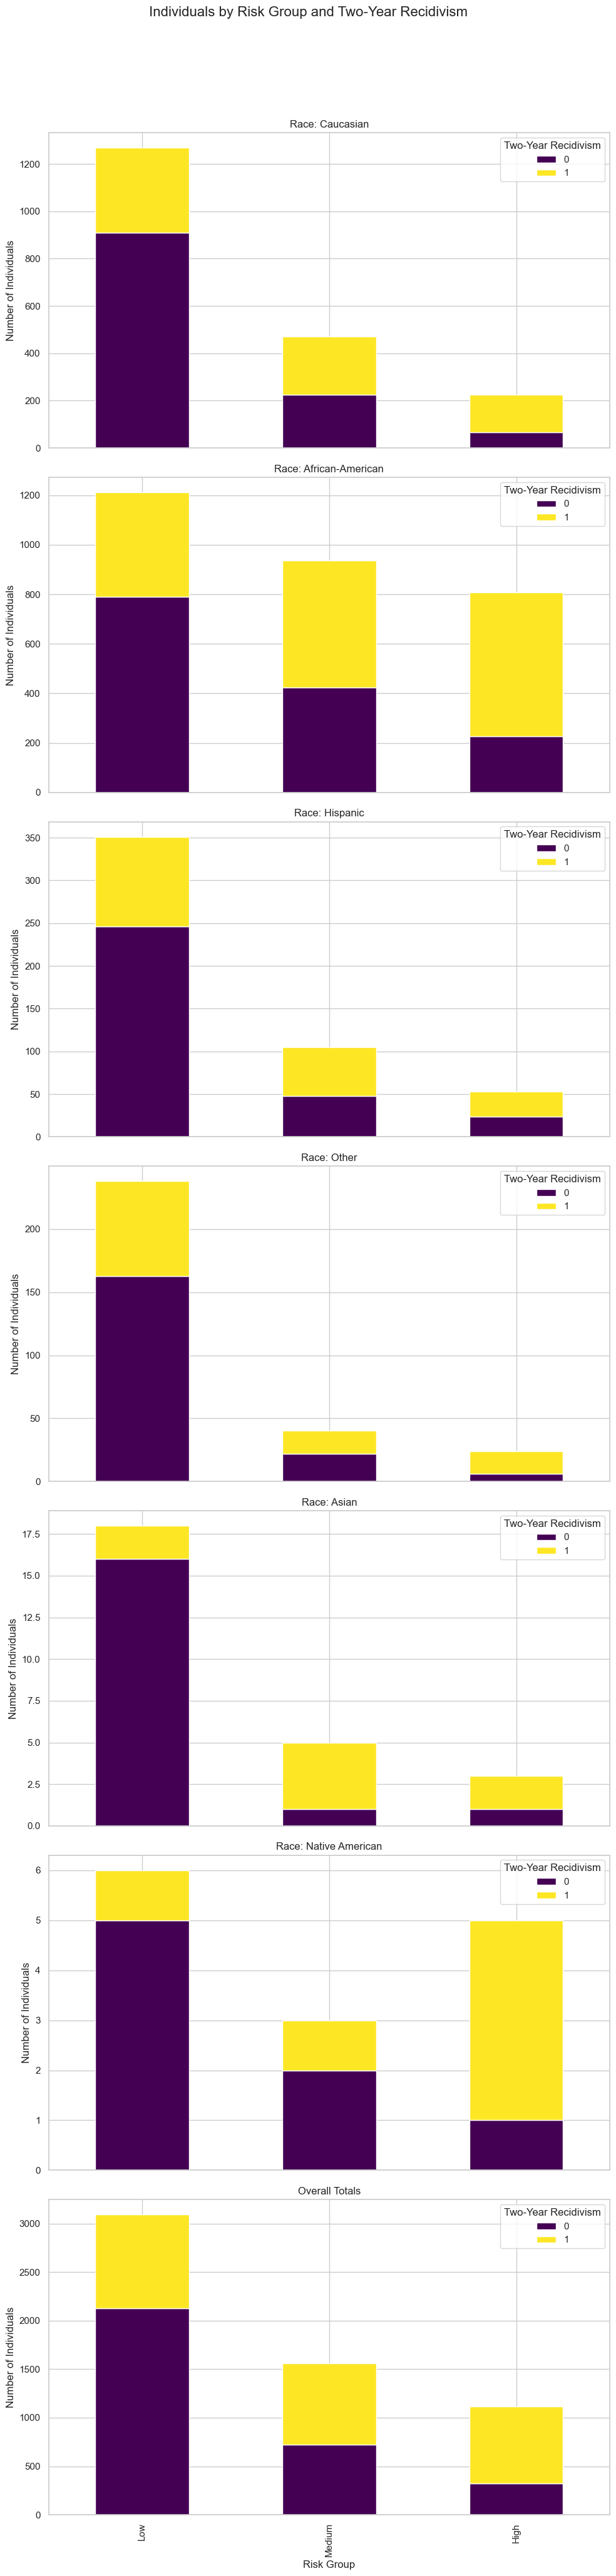

In [26]:


# Categorize decile scores into risk groups
def categorize_decile_score(decile_score):
    if decile_score <= 4:
        return "Low"
    elif 5 <= decile_score <= 7:
        return "Medium"
    else:
        return "High"

df_train['Risk_Group'] = df_train['decile_score'].apply(categorize_decile_score)

# Define the order of the Risk Groups
risk_order = ["Low", "Medium", "High"]
df_train['Risk_Group'] = pd.Categorical(df_train['Risk_Group'], categories=risk_order, ordered=True)

# Group data by Race, Risk Group, and Two-Year Recidivism
grouped_data = df_train.groupby(['race', 'Risk_Group', 'two_year_recid']).size().unstack(fill_value=0)

# Calculate totals for all races
totals_data = df_train.groupby(['Risk_Group', 'two_year_recid']).size().unstack(fill_value=0)

# Save the numerical tables as CSV files
grouped_data.to_csv("final_analysis_race_summary.csv")
totals_data.to_csv("final_analysis_totals_summary.csv")

# Create a numerical summary table
summary_table = grouped_data.reset_index()
totals_table = totals_data.reset_index()

print("Numerical Representation of Individuals by Race, Risk Group, and Two-Year Recidivism:")
print(summary_table)
print("\nNumerical Representation of Totals by Risk Group and Two-Year Recidivism:")
print(totals_table)

# Plotting: Create a bar chart for each race and the totals chart
races = df_train['race'].unique()
num_races = len(races)

# Add one subplot for totals chart
fig, axes = plt.subplots(num_races + 1, 1, figsize=(10, 6 * (num_races + 1)), sharex=True)
plt.suptitle("Individuals by Risk Group and Two-Year Recidivism", fontsize=16)

for i, race in enumerate(races):
    # Ensure the order of Risk_Group for plotting
    race_data = grouped_data.loc[race].reindex(risk_order)
    race_data.plot(
        kind="bar",
        stacked=True,
        ax=axes[i],
        colormap="viridis",
        title=f"Race: {race}",
    )
    axes[i].set_ylabel("Number of Individuals")
    axes[i].legend(title="Two-Year Recidivism", loc="upper right")

# Plot the totals chart
totals_data.reindex(risk_order).plot(
    kind="bar",
    stacked=True,
    ax=axes[num_races],
    colormap="viridis",
    title="Overall Totals",
)
axes[num_races].set_ylabel("Number of Individuals")
axes[num_races].legend(title="Two-Year Recidivism", loc="upper right")

plt.xlabel("Risk Group")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Numerical Representation of Individuals by Race, Risk Group, and Two-Year Recidivism:
two_year_recid              race Risk_Group    0    1
0               African-American       High  228  580
1               African-American        Low  789  423
2               African-American     Medium  423  514
3                          Asian       High    1    2
4                          Asian        Low   16    2
5                          Asian     Medium    1    4
6                      Caucasian       High   66  158
7                      Caucasian        Low  910  358
8                      Caucasian     Medium  224  247
9                       Hispanic       High   24   29
10                      Hispanic        Low  246  105
11                      Hispanic     Medium   48   57
12               Native American       High    1    4
13               Native American        Low    5    1
14               Native American     Medium    2    1
15                         Other       High    6  

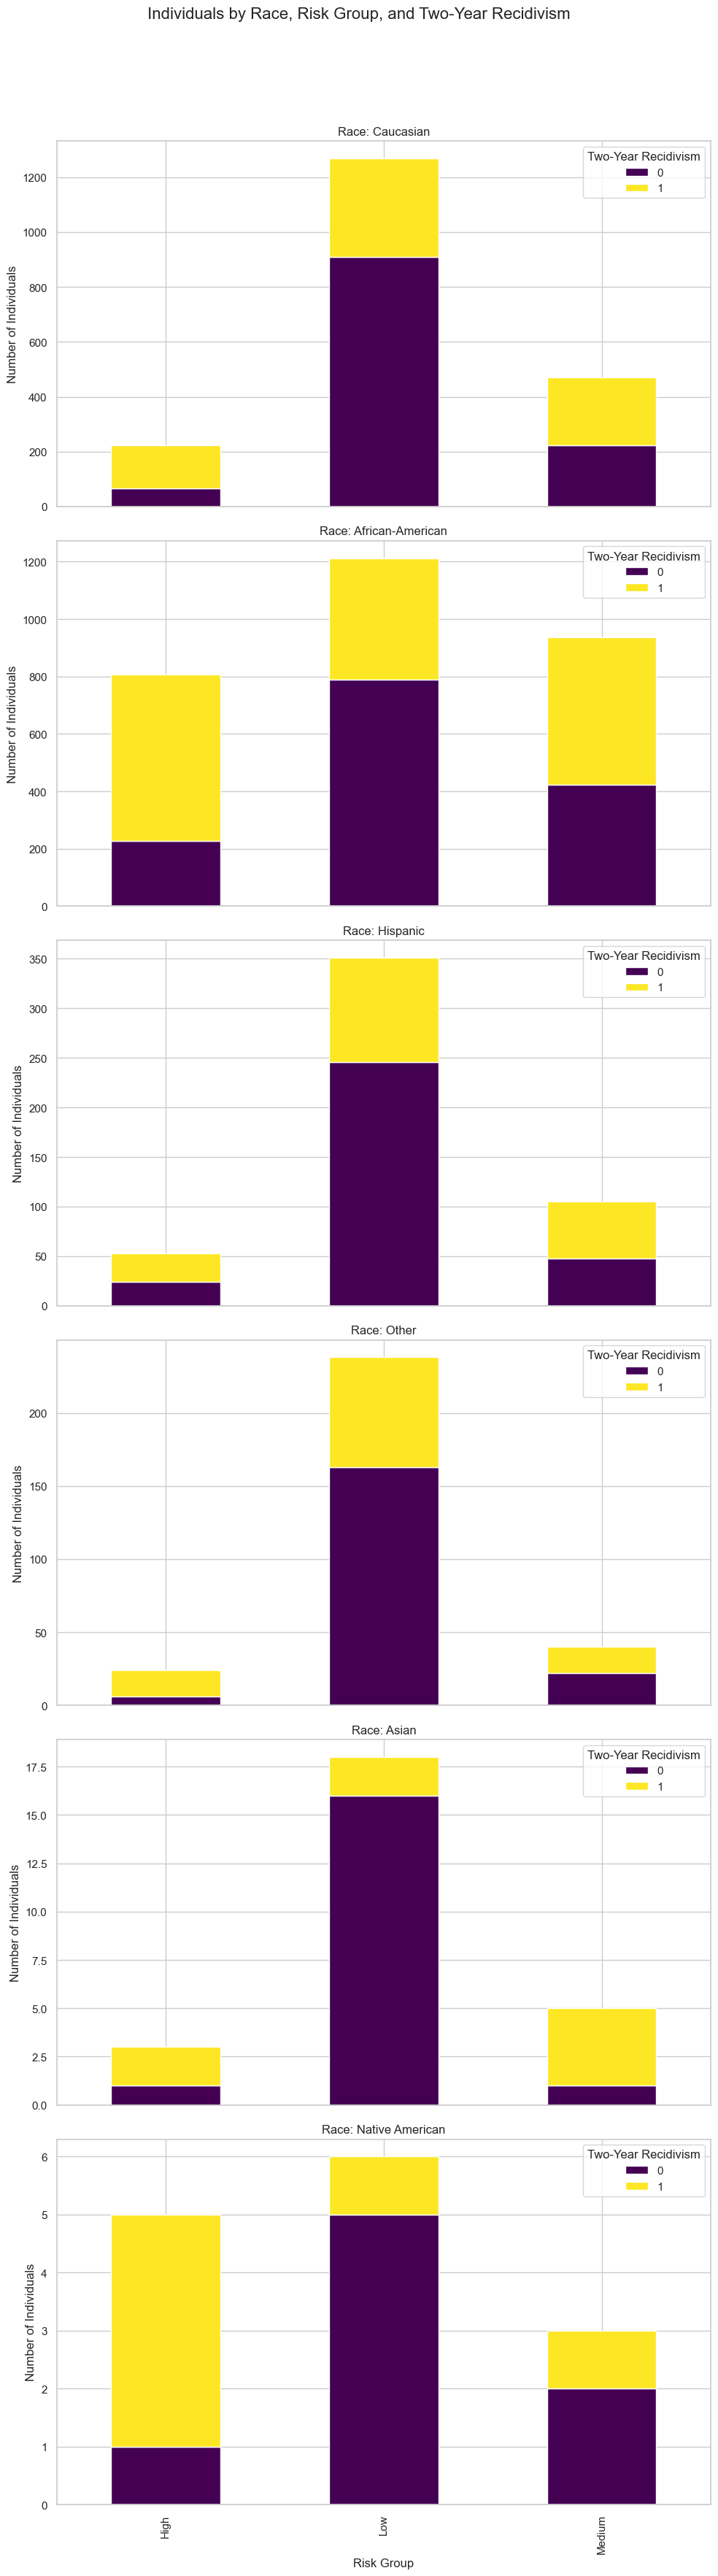

In [27]:


# Categorize decile scores into risk groups
def categorize_decile_score(decile_score):
    if decile_score <= 4:
        return "Low"
    elif 5 <= decile_score <= 7:
        return "Medium"
    else:
        return "High"

df_train['Risk_Group'] = df_train['decile_score'].apply(categorize_decile_score)

# Group data by Race, Risk Group, and Two-Year Recidivism
grouped_data = df_train.groupby(['race', 'Risk_Group', 'two_year_recid']).size().unstack(fill_value=0)

# Save the numerical table as a CSV file
grouped_data.to_csv("final_analysis_race_summary.csv")

# Create a numerical summary table
summary_table = grouped_data.reset_index()
print("Numerical Representation of Individuals by Race, Risk Group, and Two-Year Recidivism:")
print(summary_table)

# Plotting: Create a bar chart for each race
races = df_train['race'].unique()
num_races = len(races)

fig, axes = plt.subplots(num_races, 1, figsize=(10, 6 * num_races), sharex=True)
plt.suptitle("Individuals by Race, Risk Group, and Two-Year Recidivism", fontsize=16)

for i, race in enumerate(races):
    race_data = grouped_data.loc[race]
    race_data.plot(
        kind="bar",
        stacked=True,
        ax=axes[i],
        colormap="viridis",
        title=f"Race: {race}",
    )
    axes[i].set_ylabel("Number of Individuals")
    axes[i].legend(title="Two-Year Recidivism", loc="upper right")

plt.xlabel("Risk Group")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
